<a href="https://colab.research.google.com/github/Afix0/BP/blob/main/Subgroups_characterization_showcase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
#Data augmentation for better embeddings
!pip install ucimlrepo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

mushroom = fetch_ucirepo(id=73)
mushroom_df = pd.DataFrame(data=mushroom.data.features)
# mushroom_df.head()

def preprocess_mushroom_data(df):

    mapping = {
    'cap-shape': {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'},
    'cap-surface': {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'},
    'cap-color': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'bruises': {'t': 'bruises', 'f': 'no bruises'},
    'odor': {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'},
    'gill-attachment': {'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'},
    'gill-spacing': {'c': 'close', 'w': 'crowded', 'd': 'distant'},
    'gill-size': {'b': 'broad', 'n': 'narrow'},
    'gill-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-shape': {'e': 'enlarging', 't': 'tapering'},
    'stalk-root': {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted', '?': 'missing'},
    'stalk-surface-above-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-surface-below-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'},
    'stalk-color-above-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'stalk-color-below-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'},
    'veil-type': {'p': 'partial', 'u': 'universal'},
    'veil-color': {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'},
    'ring-number': {'n': 'none', 'o': 'one', 't': 'two'},
    'ring-type': {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'},
    'spore-print-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'},
    'population': {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'y': 'solitary'},
    'habitat': {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'}
}

    for column, mapping in mapping.items():
        df[column] = df[column].replace(mapping)

    return df

mushroom_df = preprocess_mushroom_data(mushroom_df).astype(str)

for column in mushroom_df.columns:
    split_columns = column.split("-")
    jointed_columns = ' '.join(split_columns)
    mushroom_df[column] = mushroom_df[column].apply(lambda x: f"{jointed_columns} is {x}")
mushroom_df.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,cap shape is convex,cap surface is smooth,cap color is brown,bruises is bruises,odor is pungent,gill attachment is free,gill spacing is close,gill size is narrow,gill color is black,stalk shape is enlarging,...,stalk surface below ring is smooth,stalk color above ring is white,stalk color below ring is white,veil type is partial,veil color is white,ring number is one,ring type is pendant,spore print color is black,population is scattered,habitat is urban
1,cap shape is convex,cap surface is smooth,cap color is yellow,bruises is bruises,odor is almond,gill attachment is free,gill spacing is close,gill size is broad,gill color is black,stalk shape is enlarging,...,stalk surface below ring is smooth,stalk color above ring is white,stalk color below ring is white,veil type is partial,veil color is white,ring number is one,ring type is pendant,spore print color is brown,population is numerous,habitat is grasses
2,cap shape is bell,cap surface is smooth,cap color is white,bruises is bruises,odor is anise,gill attachment is free,gill spacing is close,gill size is broad,gill color is brown,stalk shape is enlarging,...,stalk surface below ring is smooth,stalk color above ring is white,stalk color below ring is white,veil type is partial,veil color is white,ring number is one,ring type is pendant,spore print color is brown,population is numerous,habitat is meadows
3,cap shape is convex,cap surface is scaly,cap color is white,bruises is bruises,odor is pungent,gill attachment is free,gill spacing is close,gill size is narrow,gill color is brown,stalk shape is enlarging,...,stalk surface below ring is smooth,stalk color above ring is white,stalk color below ring is white,veil type is partial,veil color is white,ring number is one,ring type is pendant,spore print color is black,population is scattered,habitat is urban
4,cap shape is convex,cap surface is smooth,cap color is gray,bruises is no bruises,odor is none,gill attachment is free,gill spacing is crowded,gill size is broad,gill color is black,stalk shape is tapering,...,stalk surface below ring is smooth,stalk color above ring is white,stalk color below ring is white,veil type is partial,veil color is white,ring number is one,ring type is evanescent,spore print color is brown,population is abundant,habitat is grasses


In [7]:
#Aglomerative clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec


sentences = []
for i in range(len(mushroom_df)):
    sentence = []
    for word in mushroom_df.iloc[i]:
        sentence.append(word)
    sentences.append(sentence)

def sentence_embedding(sentence, model):
    word_embeddings = []
    for word in sentence:
        word_embeddings.append(model.wv[word])
    return np.mean(word_embeddings, axis=0)

model = Word2Vec(sentences, min_count=1, vector_size=20, window=5)
embeddings = np.array([sentence_embedding(sentence, model) for sentence in sentences])

labels_aglomerative_average = AgglomerativeClustering(n_clusters= 23, metric = 'cosine', linkage='average').fit_predict(embeddings)


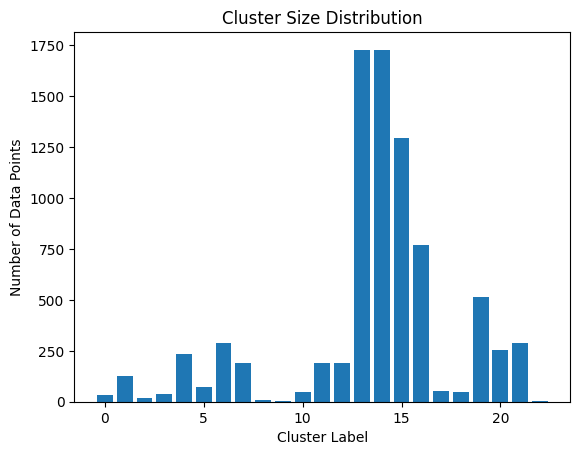

In [8]:
#Cluster size distribution visualization
cluster_counts = {}
for label in labels_aglomerative_average:
    cluster_counts[label] = cluster_counts.get(label, 0) + 1

cluster_sizes = list(cluster_counts.values())
cluster_labels = list(cluster_counts.keys())

plt.bar(cluster_labels, cluster_sizes)
plt.xlabel("Cluster Label")
plt.ylabel("Number of Data Points")
plt.title("Cluster Size Distribution")
plt.show()

In [10]:
#Comparison dataframe
mushroom_raw = pd.DataFrame(data=mushroom.data.features)
mushroom_raw = preprocess_mushroom_data(mushroom_raw)
mushroom_raw = mushroom_raw.fillna('unknown')
mushroom_raw.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,convex,smooth,brown,bruises,pungent,free,close,narrow,black,enlarging,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
1,convex,smooth,yellow,bruises,almond,free,close,broad,black,enlarging,...,smooth,white,white,partial,white,one,pendant,brown,numerous,grasses
2,bell,smooth,white,bruises,anise,free,close,broad,brown,enlarging,...,smooth,white,white,partial,white,one,pendant,brown,numerous,meadows
3,convex,scaly,white,bruises,pungent,free,close,narrow,brown,enlarging,...,smooth,white,white,partial,white,one,pendant,black,scattered,urban
4,convex,smooth,gray,no bruises,none,free,crowded,broad,black,tapering,...,smooth,white,white,partial,white,one,evanescent,brown,abundant,grasses


In [11]:
#Comparison of most common elements between clusters
from collections import Counter

cluster_indexes_dict = {label: [] for label in set(cluster_labels)}
for i, label in enumerate(cluster_labels):
    cluster_indexes_dict[label].append(i)

def most_common(list):
    data = Counter(list)
    return data.most_common(1)[0][0]

def compare_most_common_elements(dataset, cluster_indexes):

    for cluster_label, cluster_indices in cluster_indexes.items():
        cluster_data = dataset.loc[cluster_indices]
        most_common_elements = {}
        for col in cluster_data.columns:
            most_common_elements[col] = most_common(cluster_data[col])

        print(f"Most common elements in cluster {cluster_label}:")
        for col, most_common_val in most_common_elements.items():
            print(f"  {col}: {most_common_val}")



comparison_indexes_dict = {key: cluster_indexes_dict[key] for key in [15,14]}

compare_most_common_elements(mushroom_raw, comparison_indexes_dict)

Most common elements in cluster 15:
  cap-shape: bell
  cap-surface: scaly
  cap-color: white
  bruises: bruises
  odor: anise
  gill-attachment: free
  gill-spacing: close
  gill-size: broad
  gill-color: brown
  stalk-shape: enlarging
  stalk-root: club
  stalk-surface-above-ring: smooth
  stalk-surface-below-ring: smooth
  stalk-color-above-ring: white
  stalk-color-below-ring: white
  veil-type: partial
  veil-color: white
  ring-number: one
  ring-type: pendant
  spore-print-color: brown
  population: scattered
  habitat: meadows
Most common elements in cluster 14:
  cap-shape: convex
  cap-surface: scaly
  cap-color: yellow
  bruises: bruises
  odor: anise
  gill-attachment: free
  gill-spacing: close
  gill-size: broad
  gill-color: gray
  stalk-shape: enlarging
  stalk-root: club
  stalk-surface-above-ring: smooth
  stalk-surface-below-ring: smooth
  stalk-color-above-ring: white
  stalk-color-below-ring: white
  veil-type: partial
  veil-color: white
  ring-number: one
  ring-

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import export_text

mushroom_classify = mushroom_raw.assign(cluster = labels_aglomerative_average)

encoder = OneHotEncoder()
X = mushroom_classify.drop(columns=['cluster'])
X_encoded = encoder.fit_transform(mushroom_classify[['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat' ]]).toarray()
y = mushroom_classify['cluster']
X_df = pd.DataFrame(X, columns=encoder.get_feature_names_out())


X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=73, stratify=y)

clf = DecisionTreeClassifier(max_depth=9, random_state=73)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.96
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.73      0.84        26
           2       1.00      0.33      0.50         3
           3       1.00      1.00      1.00         7
           4       0.42      1.00      0.59        47
           5       0.00      0.00      0.00        14
           6       1.00      1.00      1.00        58
           7       1.00      1.00      1.00        38
           8       0.00      0.00      0.00         2
           9       1.00      1.00      1.00         1
          10       0.00      0.00      0.00        10
          11       1.00      1.00      1.00        38
          12       1.00      1.00      1.00        38
          13       1.00      1.00      1.00       346
          14       1.00      1.00      1.00       346
          15       1.00      1.00      1.00       259
          16       1.00      1.00      1.00       154
          17

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
print(export_text(clf, feature_names = list(X_df.columns)))


|--- gill-color_buff <= 0.50
|   |--- ring-type_large <= 0.50
|   |   |--- habitat_woods <= 0.50
|   |   |   |--- stalk-shape_enlarging <= 0.50
|   |   |   |   |--- odor_foul <= 0.50
|   |   |   |   |   |--- class: 16
|   |   |   |   |--- odor_foul >  0.50
|   |   |   |   |   |--- class: 6
|   |   |   |--- stalk-shape_enlarging >  0.50
|   |   |   |   |--- stalk-root_club <= 0.50
|   |   |   |   |   |--- odor_pungent <= 0.50
|   |   |   |   |   |   |--- gill-attachment_free <= 0.50
|   |   |   |   |   |   |   |--- class: 11
|   |   |   |   |   |   |--- gill-attachment_free >  0.50
|   |   |   |   |   |   |   |--- habitat_waste <= 0.50
|   |   |   |   |   |   |   |   |--- odor_none <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 7
|   |   |   |   |   |   |   |   |--- odor_none >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 4
|   |   |   |   |   |   |   |--- habitat_waste >  0.50
|   |   |   |   |   |   |   |   |--- class: 12
|   |   |   |   |   |--- odor_pungent >  0.50

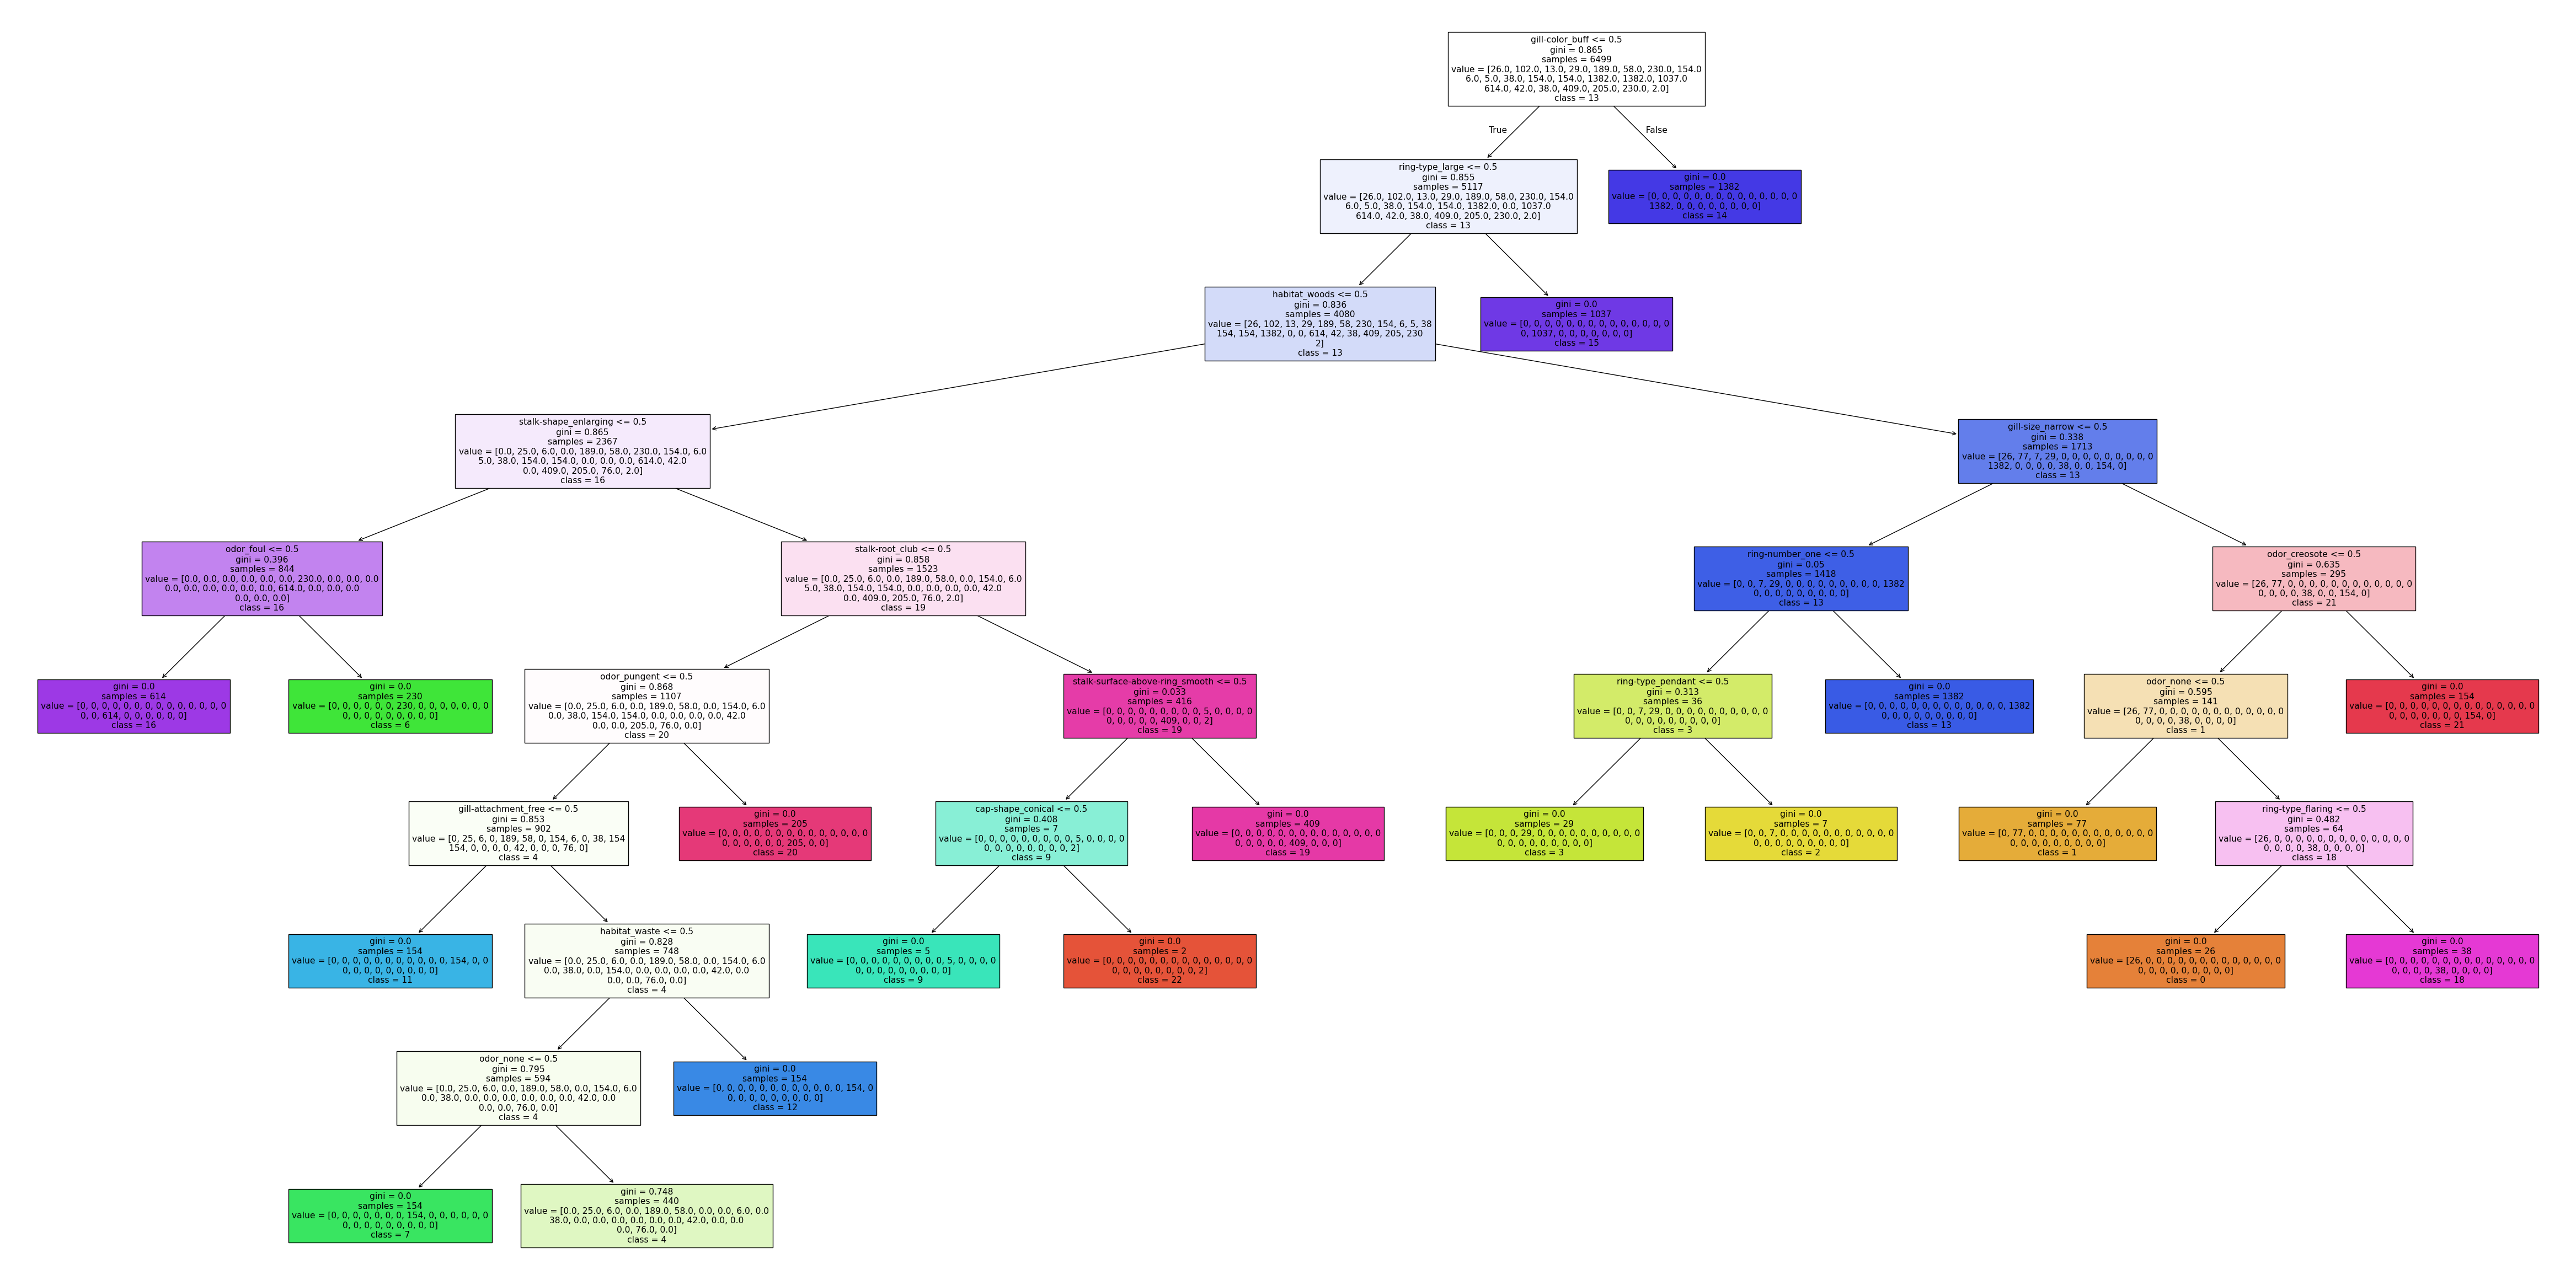

'decision_tree.pdf'

In [28]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
import graphviz

plt.figure(figsize=(60, 30))
clusters_str = [str(c) for c in clf.classes_]
plot_tree(clf, filled=True, feature_names=list(X_df.columns), class_names=clusters_str)
plt.show()

dot_data = export_graphviz(clf, out_file=None,
                                feature_names=list(X_df.columns),
                                class_names=clusters_str,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")

In [46]:
#Subgroups characterization
#Note that the features were One-hot encoded so all the categorical variables are boolean
from sklearn.tree import export_text

def extract_rules(tree, feature_names, class_names, node=0, depth=0, rule=[], rules_list=None):
    if rules_list is None:
        rules_list = []

    left_child = tree.tree_.children_left[node]
    right_child = tree.tree_.children_right[node]
    threshold = tree.tree_.threshold[node]
    feature = tree.tree_.feature[node]
    value = tree.tree_.value[node]

    if left_child == -1 and right_child == -1:
        class_label = class_names[value.argmax()]
        rules_list.append((class_label, " AND ".join(rule)))
        return rules_list

    if left_child != -1:
        left_rule = rule + [f"{feature_names[feature]} <= {threshold:.2f}"]
        extract_rules(tree, feature_names, class_names, left_child, depth + 1, left_rule, rules_list)
    if right_child != -1:
        right_rule = rule + [f"{feature_names[feature]} > {threshold:.2f}"]
        extract_rules(tree, feature_names, class_names, right_child, depth + 1, right_rule, rules_list)

    if depth == 0:
        sorted_rules = sorted(rules_list, key=lambda x: x[0])
        print("Rules for subgroups:")
        for class_label, rule_text in sorted_rules:
            print(f"Rule for subgroup '{class_label}': {rule_text}")

extract_rules(clf, list(X_df.columns), list(set(mushroom_classify['cluster'])))

Rules for subgroups:
Rule for subgroup '0': gill-color_buff <= 0.50 AND ring-type_large <= 0.50 AND habitat_woods > 0.50 AND gill-size_narrow > 0.50 AND odor_creosote <= 0.50 AND odor_none > 0.50 AND ring-type_flaring <= 0.50
Rule for subgroup '1': gill-color_buff <= 0.50 AND ring-type_large <= 0.50 AND habitat_woods > 0.50 AND gill-size_narrow > 0.50 AND odor_creosote <= 0.50 AND odor_none <= 0.50
Rule for subgroup '2': gill-color_buff <= 0.50 AND ring-type_large <= 0.50 AND habitat_woods > 0.50 AND gill-size_narrow <= 0.50 AND ring-number_one <= 0.50 AND ring-type_pendant > 0.50
Rule for subgroup '3': gill-color_buff <= 0.50 AND ring-type_large <= 0.50 AND habitat_woods > 0.50 AND gill-size_narrow <= 0.50 AND ring-number_one <= 0.50 AND ring-type_pendant <= 0.50
Rule for subgroup '4': gill-color_buff <= 0.50 AND ring-type_large <= 0.50 AND habitat_woods <= 0.50 AND stalk-shape_enlarging > 0.50 AND stalk-root_club <= 0.50 AND odor_pungent <= 0.50 AND gill-attachment_free > 0.50 AND ha